In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
!pip install opencv-python
import utils
import cv2

In [6]:
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib

def GetColor(pic_name,cluster_number):
    image = cv2.imread(pic_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # show our image
    plt.figure()
    plt.axis("off")
    plt.imshow(image)
    
    #print rgb
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = KMeans(n_clusters = cluster_number)
    clt.fit(image)
    print(clt.cluster_centers_)
    return(clt.cluster_centers_)

In [7]:
#white - 255,255,255
#black - 0,0,0

In [8]:
import requests

def DownloadPNG(image_url,name):
    img_data = requests.get(image_url).content
    with open(name, 'wb') as handler:
        handler.write(img_data)

In [9]:
from lxml import html

def UrlToTree(url): #https://www.theory.com/womens-dresses/
    r = requests.get(url, allow_redirects=True)
    open('temp.html', 'wb').write(r.content)
    tree = html.parse('temp.html')
    return tree

def TreeToSrc(tree,number):#1-240211
    image_url = tree.xpath("//div[3]/div[1]/div/div/div/a/img/@src")[number]
    image_url = "https:" + image_url
    return image_url

def GetSrcLength(tree):
    number = len(tree.xpath("//div[3]/div[1]/div/div/div/a/img/@src"))
    return number

def GetTexture(tree,number): #Color,Texture,Pattern,Cut,Neck,Score
    caption = tree.xpath(r"//a[@class='name-link js-track-gtm-pid']/text()")[number]
    print(caption)
    return caption

[[233.68622307 231.24141348 229.52276953]
 [ 91.47703294  81.19376528  79.60113596]]

Stretch Wool Shift Dress

[[232.25321404 230.31204082 229.15607735]
 [ 47.25873522  41.11517462  41.13714158]]

Blazer Dress in Good Wool

[[ 61.27128311  52.31135826  53.3001862 ]
 [230.60489463 230.46777172 230.39595325]]

Flared Dress in Petal Print Silk

[[231.76155921 229.38780779 227.72705721]
 [ 65.19698964  54.30374518  49.71412105]]

Italian Stretch Wool Split Front Dress

[[233.02748835 230.78138448 229.33195207]
 [ 58.94746352  50.01693945  47.6312686 ]]

Jatinn Dress in Good Wool

[[ 65.36469821  53.41201736  48.98348995]
 [234.01582838 229.27027791 225.92249509]]

Sleeveless Fitted Dress in Good Wool

[[233.70319488 229.96133795 227.65790911]
 [110.39764151  56.08122178  58.24194329]]

Jatinn Dress in Good Wool

[[230.31210724 228.95285013 228.24346281]
 [ 38.38629171  34.40118787  34.60339727]]

Zip Shirt Dress in Crepe

[[226.08754498 224.99104078 223.9656029 ]
 [ 25.88670489  24.436422

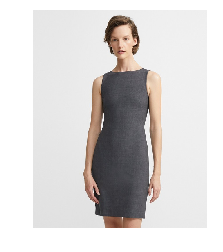

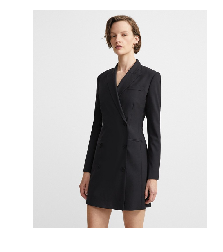

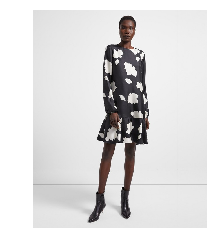

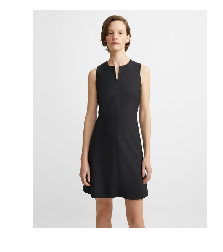

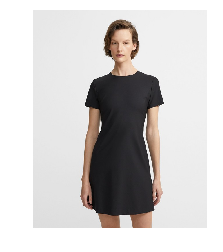

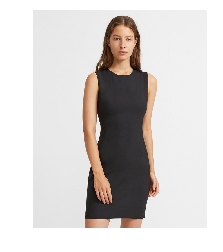

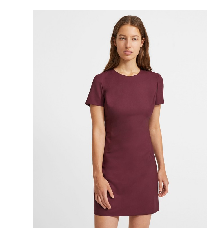

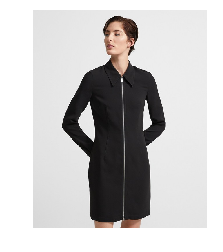

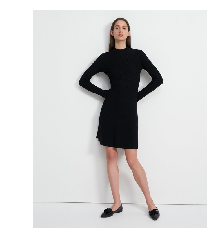

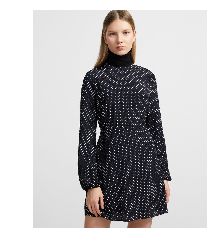

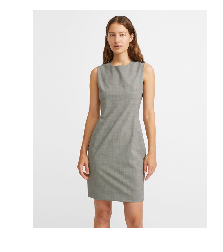

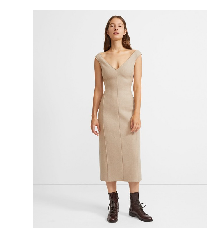

In [10]:
url = "https://www.theory.com/womens-dresses/"
name = 'dress'
tree=UrlToTree(url)
number=GetSrcLength(tree)
for i in range(number):
    DownloadPNG(TreeToSrc(tree,i),name+str(i)+'.png')
    GetColor(name+str(i)+'.png',2)
    GetTexture(tree,i)